### Artifical Neural Network (ANN) Workshop

**Ryan Paul Lafler | BDA 696**

In [1]:
!pip install tensorflow

In [2]:
import pandas as pd
import numpy as np

import tensorflow as tf

import matplotlib.pyplot as plt

2024-10-23 16:47:58.804802: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-23 16:47:58.817145: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-23 16:47:58.918074: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-23 16:47:59.021423: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-23 16:47:59.106665: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

## Importing and Viewing the Data

In [6]:
cars_df = pd.read_csv(
    'cars.csv',
    na_values = ['-', '.', ' '],
)
print(len(cars_df), len(cars_df.columns))
cars_df.head(5)

428 15


,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,"$36,945","$33,337",3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,"$23,820","$21,761",2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,"$26,990","$24,647",2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,"$33,195","$30,299",3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,"$43,755","$39,014",3.5,6.0,225,18,24,3880,115,197


## Metadata for Cars

In [8]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 428 entries, 0 to 427
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         428 non-null    object 
 1   Model        428 non-null    object 
 2   Type         428 non-null    object 
 3   Origin       428 non-null    object 
 4   DriveTrain   428 non-null    object 
 5   MSRP         428 non-null    object 
 6   Invoice      428 non-null    object 
 7   EngineSize   428 non-null    float64
 8   Cylinders    426 non-null    float64
 9   Horsepower   428 non-null    int64  
 10  MPG_City     428 non-null    int64  
 11  MPG_Highway  428 non-null    int64  
 12  Weight       428 non-null    int64  
 13  Wheelbase    428 non-null    int64  
 14  Length       428 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 50.3+ KB


### Object Coercion to Numeric Type

In [10]:
def string_to_float(df, columns) :
    for column in columns :
        df[column] = df[column].str.replace(r'[,$]', '', regex=True).astype(float)
    return df

In [12]:
cars_df_new = string_to_float(
    cars_df,
    columns = ['MSRP', 'Invoice']
)
cars_df_new.head(7)

,Make,Model,Type,Origin,DriveTrain,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
0,Acura,MDX,SUV,Asia,All,36945.0,33337.0,3.5,6.0,265,17,23,4451,106,189
1,Acura,RSX Type S 2dr,Sedan,Asia,Front,23820.0,21761.0,2.0,4.0,200,24,31,2778,101,172
2,Acura,TSX 4dr,Sedan,Asia,Front,26990.0,24647.0,2.4,4.0,200,22,29,3230,105,183
3,Acura,TL 4dr,Sedan,Asia,Front,33195.0,30299.0,3.2,6.0,270,20,28,3575,108,186
4,Acura,3.5 RL 4dr,Sedan,Asia,Front,43755.0,39014.0,3.5,6.0,225,18,24,3880,115,197
5,Acura,3.5 RL w/Navigation 4dr,Sedan,Asia,Front,46100.0,41100.0,3.5,6.0,225,18,24,3893,115,197
6,Acura,NSX coupe 2dr manual S,Sports,Asia,Rear,89765.0,79978.0,3.2,6.0,290,17,24,3153,100,174


In [15]:
cars_df_new.select_dtypes(include='number').corr()

,MSRP,Invoice,EngineSize,Cylinders,Horsepower,MPG_City,MPG_Highway,Weight,Wheelbase,Length
MSRP,1.000000,0.999132,0.571753,0.649742,0.826945,-0.475020,-0.439622,0.448426,0.152000,0.172037
Invoice,0.999132,1.000000,0.564498,0.645226,0.823746,-0.470442,-0.434585,0.442332,0.148328,0.166586
EngineSize,0.571753,0.564498,1.000000,0.908002,0.787435,-0.709471,-0.717302,0.807867,0.636517,0.637448
Cylinders,0.649742,0.645226,0.908002,1.000000,0.810341,-0.684402,-0.676100,0.742209,0.546730,0.547783
Horsepower,0.826945,0.823746,0.787435,0.810341,1.000000,-0.676699,-0.647195,0.630796,0.387398,0.381554
MPG_City,-0.475020,-0.470442,-0.709471,-0.684402,-0.676699,1.000000,0.941021,-0.737966,-0.507284,-0.501526
MPG_Highway,-0.439622,-0.434585,-0.717302,-0.676100,-0.647195,0.941021,1.000000,-0.790989,-0.524661,-0.466092
Weight,0.448426,0.442332,0.807867,0.742209,0.630796,-0.737966,-0.790989,1.000000,0.760703,0.690021
Wheelbase,0.152000,0.148328,0.636517,0.546730,0.387398,-0.507284,-0.524661,0.760703,1.000000,0.889195
Length,0.172037,0.166586,0.637448,0.547783,0.381554,-0.501526,-0.466092,0.690021,0.889195,1.000000


In [19]:
target = cars_df_new['MSRP']
predictors = cars_df_new.drop(
    ['MSRP', 'Invoice', 'Model'],
    axis = 1
)
predictors, target

(      Make   Type  Origin DriveTrain  EngineSize  Cylinders  Horsepower  \
 0    Acura    SUV    Asia        All         3.5        6.0         265   
 1    Acura  Sedan    Asia      Front         2.0        4.0         200   
 2    Acura  Sedan    Asia      Front         2.4        4.0         200   
 3    Acura  Sedan    Asia      Front         3.2        6.0         270   
 4    Acura  Sedan    Asia      Front         3.5        6.0         225   
 ..     ...    ...     ...        ...         ...        ...         ...   
 423  Volvo  Sedan  Europe      Front         2.4        5.0         197   
 424  Volvo  Sedan  Europe      Front         2.3        5.0         242   
 425  Volvo  Sedan  Europe      Front         2.9        6.0         268   
 426  Volvo  Wagon  Europe      Front         1.9        4.0         170   
 427  Volvo  Wagon  Europe        All         2.5        5.0         208   
 
      MPG_City  MPG_Highway  Weight  Wheelbase  Length  
 0          17           23  

### Building a Scikit-Learn Pipeline

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

In [25]:
# Categorical DataFrame
cat_df = predictors.select_dtypes(
    include = 'object'
)

# Numeric DataFRame
num_df = predictors.select_dtypes(
    include = 'number'
)

In [26]:
# Catgeorical processing pipe:
cat_pipe = Pipeline(
    steps = [
        ('impute', SimpleImputer(strategy='most_frequent')) ,
        ('one-hot', OneHotEncoder(handle_unknown = 'ignore'))
    ]
)
cat_pipe

Pipeline(steps=[('impute', SimpleImputer(strategy='most_frequent')),
                ('one-hot', OneHotEncoder(handle_unknown='ignore'))])

In [28]:
# Numeric Processing Pipeline
num_pipe = Pipeline(
    steps = [
        ('impute', SimpleImputer(strategy='median')) ,
        ('scaler', StandardScaler())
    ]
)
num_pipe

Pipeline(steps=[('impute', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [29]:
# ColumnTransformer Processing Pipeline
processing_pipe = ColumnTransformer(
    transformers = [
        ('cat_pipe',
        cat_pipe,
        cat_df.columns.tolist()  # Extracts the feature names from the categorical DataFrame
        ) ,
        (
            'num_pipe' ,
            num_pipe ,
            num_df.columns.tolist()  # Extracts numeric feature names
        )
    ]
)

processing_pipe

ColumnTransformer(transformers=[('cat_pipe',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('one-hot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Make', 'Type', 'Origin', 'DriveTrain']),
                                ('num_pipe',
                                 Pipeline(steps=[('impute',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['EngineSize', 'Cylinders', 'Horsepower',
                                  'MPG_City', 'MPG_Highway', 'Weight',
                                  'Wheelbase', 'Length'])])

### View the Processed Dataset

In [31]:
predictors_df = processing_pipe.fit_transform(
    predictors
).toarray()
predictors_df

# Store the array of processed data in a DatFrame
predictors_df = pd.DataFrame(predictors_df)

# Retrieve my processed data column names
predictors_df = predictors_df.set_axis(
    processing_pipe.get_feature_names_out().tolist() ,
    axis = 1
)

predictors_df

,cat_pipe__Make_Acura,cat_pipe__Make_Audi,cat_pipe__Make_BMW,cat_pipe__Make_Buick,cat_pipe__Make_Cadillac,cat_pipe__Make_Chevrolet,cat_pipe__Make_Chrysler,cat_pipe__Make_Dodge,cat_pipe__Make_Ford,cat_pipe__Make_GMC,...,cat_pipe__DriveTrain_Front,cat_pipe__DriveTrain_Rear,num_pipe__EngineSize,num_pipe__Cylinders,num_pipe__Horsepower,num_pipe__MPG_City,num_pipe__MPG_Highway,num_pipe__Weight,num_pipe__Wheelbase,num_pipe__Length
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.273884,0.123365,0.684503,-0.584995,-0.670235,1.151631,-0.259477,0.183935
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,-1.080764,-1.164443,-0.221395,0.752902,0.724832,-1.055214,-0.861735,-1.001460
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,-0.719525,-1.164443,-0.221395,0.370645,0.376065,-0.458983,-0.379929,-0.234440
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.002954,0.123365,0.754187,-0.011611,0.201682,-0.003896,-0.018574,-0.025252
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.273884,0.123365,0.127028,-0.393867,-0.495852,0.398428,0.824586,0.741768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,-0.719525,-0.520539,-0.263205,0.179517,0.201682,-0.168782,-0.379929,-0.025252
424,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,-0.809835,-0.520539,0.363955,-0.011611,-0.147085,-0.168782,-0.379929,-0.025252
425,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,-0.267976,0.123365,0.726313,-0.202739,-0.147085,0.098994,0.222329,0.253664
426,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,-1.171074,-1.164443,-0.639501,0.370645,0.376065,-0.997173,-0.861735,-0.443627


In [32]:
predictors_df.to_csv(
    'processed_cars.csv'
)

## Building the Neural Network (ANN --> Artifical Neural Network)

In [33]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.backend import clear_session

clear_session()

In [36]:
input = Input(
    shape = (predictors_df.shape[1], ) ,  # Automatically assigns a neuron to each feature
    name = 'Input'
)

# First hidden layer
x = Dense(
    units = 100 ,
    activation = 'relu' ,
    name = 'dense1'
) (input)  # Functional API syntax --> specify what goes into each layer

# Second hidden layer
x = Dense(
    units = 200 ,
    activation = 'relu' ,
    name = 'dense2'
) (x)

# Thirs hidden layer 
x = Dense(
    units = 80 ,
    activation = 'relu' ,
    name = 'dense3'
) (x)

# Foourth hidden layer
x = Dense(
    units = 20 ,
    activation = 'relu' ,
    name = 'dense4'
) (x)

# Output layer
output = Dense(
    units = 1 ,
    activation = 'linear' ,  # prediction
    name = 'output'
) (x)

In [37]:
# Bring my input and output together
network1 = Model(
    inputs = [input] ,
    outputs = [output] ,
)

network1.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input (InputLayer)              │ (None, 58)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 100)            │         5,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense2 (Dense)                  │ (None, 200)            │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense3 (Dense)                  │ (None, 80)             │        16,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense4 (Dense)                  │ (None, 20)             │         1,620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 1)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 43,821 (171.18 KB)

 Trainable params: 43,821 (171.18 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
from tensorflow.keras.losses import MeanSquaredError as MSE
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import MeanAbsoluteError as MAE

# Compile the ANN
network1.compile(
    loss = MSE() ,
    optimizer = Adam(learning_rate = 0.001) ,
    metrics = [MAE()]
)

### Train the ANN on the Set of Predictors and Target Feature (MSRP)

In [41]:
history = network1.fit(
    predictors_df, target ,
    epochs = 1000 , # Training network for 100-total iterations (epochs)
    batch_size = 50 ,  # 50-observations at-a-time in a batch ,
    verbose = 1
)

Epoch 1/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 42490120.0000 - mean_absolute_error: 4007.4343 
Epoch 2/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 46495076.0000 - mean_absolute_error: 4161.2393 
Epoch 3/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 57162984.0000 - mean_absolute_error: 3969.4158 
Epoch 4/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 46865256.0000 - mean_absolute_error: 4056.9595 
Epoch 5/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 30867502.0000 - mean_absolute_error: 3553.0132 
Epoch 6/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 44309564.0000 - mean_absolute_error: 3845.1855 
Epoch 7/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 39352684.0000 - mean_absolute_error: 3617.9351 
Epoch 8/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 30810888.0000 - mean_absolute_error: 3448.3101 
Epoch 9/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 35524592.0000 - mean_absolute_error: 3716.2690 
Epoch 10/1000
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/

### Visualize Training over Epochs (Iterations)

Text(0, 0.5, 'MAE')

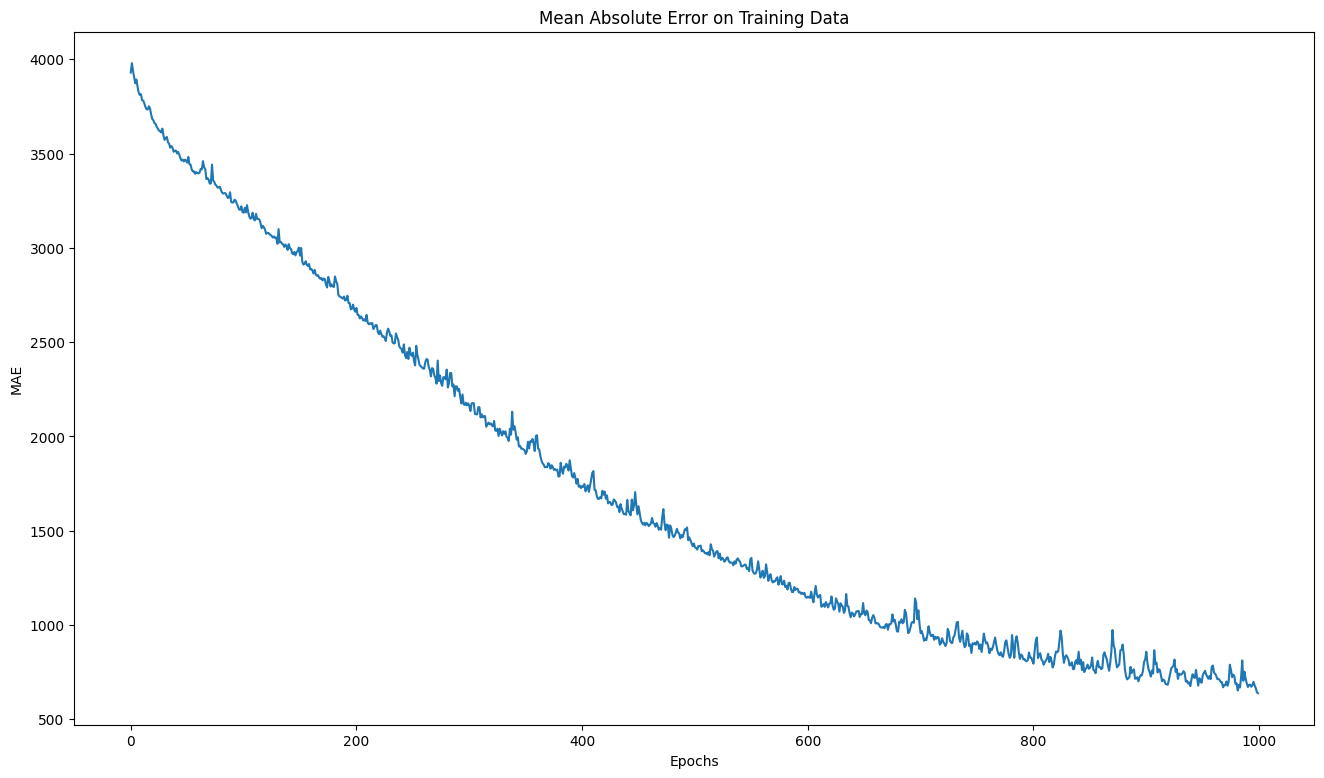

In [52]:
history.history['mean_absolute_error']

fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(
    range(0, len(history.history['mean_absolute_error'])) ,
    history.history['mean_absolute_error']
)
ax.set_title('Mean Absolute Error on Training Data')
ax.set_xlabel('Epochs')
ax.set_ylabel('MAE')